### Практическое задание к курсу и к 8 уроку

### -- Автор: Шенк Евгений Станиславович

### 1. Обучите нейронную сеть любой архитектуры которой не было на курсе, либо обучите нейронную сеть разобранной архитектуры, но на том датасете, которого не было на уроках. Сделайте анализ, того, что вам помогло в улучшения работы нейронной сети.

Была обучена сеть по распознаванию тональности отзывов (positive/negative) к фильмам. Использован датасет https://www.tensorflow.org/datasets/catalog/glue/sst2.  
За основу была взята предобученная сеть CT_BERT (https://github.com/digitalepidemiologylab/covid-twitter-bert) (https://paperswithcode.com/paper/covid-twitter-bert-a-natural-language), файл CT_BERT_Huggingface_(GPU_training).ipynb  
Данная сеть является сетью-трансформером предобученной на большом массиве сообщений в Twitter на тему COVID-19.

#### Файл с кодом: model/CT_BERT_Huggingface_for_SST2.ipynb

Выполнение:  
1. Взята модель с Huggingface Library.  
2. Скачан и обработан датасет SST-2.  
3. Переобучена модель на новых данных.  
4. Сделано несколько предсказаний:  

In [1]:
"""
input_text = "none of this violates the letter of book"  
    "sentiment": "positive",  
    "sentiment_probabilities": {  
    "positive": 0.7127182483673096,
    "negative": 0.2872817814350128} 
        """

'\ninput_text = "none of this violates the letter of book"  \n    "sentiment": "positive",  \n    "sentiment_probabilities": {  \n    "positive": 0.7127182483673096,\n    "negative": 0.2872817814350128} \n        '

In [2]:
"""
input_text = "while the mystery surrounding the nature of the boat 's malediction remains intriguing enough to sustain mild interest , the picture refuses to offer much accompanying sustenance in the way of characterization , humor or plain old popcorn fun ."
    "sentiment": "negative",
    "sentiment_probabilities": {
    "negative": 0.954450249671936,
    "positive": 0.045549776405096054} 
        """

'\ninput_text = "while the mystery surrounding the nature of the boat \'s malediction remains intriguing enough to sustain mild interest , the picture refuses to offer much accompanying sustenance in the way of characterization , humor or plain old popcorn fun ."\n    "sentiment": "negative",\n    "sentiment_probabilities": {\n    "negative": 0.954450249671936,\n    "positive": 0.045549776405096054} \n        '

In [3]:
"""
input_text = "gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up ."
    "sentiment": "negative",
    "sentiment_probabilities": {
    "negative": 0.9548023343086243,
    "positive": 0.045197661966085434} 
        """

'\ninput_text = "gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up ."\n    "sentiment": "negative",\n    "sentiment_probabilities": {\n    "negative": 0.9548023343086243,\n    "positive": 0.045197661966085434} \n        '

5. Анализ и возникшие проблемы:  
Для запуска данного процесса потребовалось снять ограничение в Win10 на 260 символов в адресе файлов, иначе загрузка и распаковка датасета не работала.
Также пришлось запускать обучение на процессоре, т.к. у GPU не хватало памяти (у NVIDIA GeForce GTX 970 всего 4GB памяти) даже при train_batch_size  = 1.  
В целом, данная модель изначально была хорошо настроена в плане точности результатов (accuracy: ~0.83)  
Основные параметры   
max_seq_length = 96 #длина предложений  
train_batch_size = 8  
eval_batch_size = 8  
Изменение данных параметров немного изменяло скорость обучения (в целом 30-40 мин на эпоху), но на качество сильно не влияло. Запустить на GPU не удалось ни с какими параметрами (на процессоре занималось около 20GB из 32GB RAM)  
use_percentage_of_data = 5  
Количество данных из датасета (SST-2) в процентах из датасета используемых для обучения.
3-5 процентов оптимально по скорости / качеству
num_epochs = 3  
Изначально было 1. Увеличение количества эпох положительно повлияло на качество (accuracy: ~0.88)  


### 2. Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму нейронных сетей, который не рассматривался на курсе. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике? 

Обзор статьи: https://arxiv.org/pdf/2004.10934v1.pdf  

Название: "YOLOv4: Оптимальная скорость и точность обнаружения объектов"

В данной статье рассматривается:  
1. Введение и краткое сравнение с другими детекторами.  
Сравнение с другими алгоритмами детектирования объектов.  

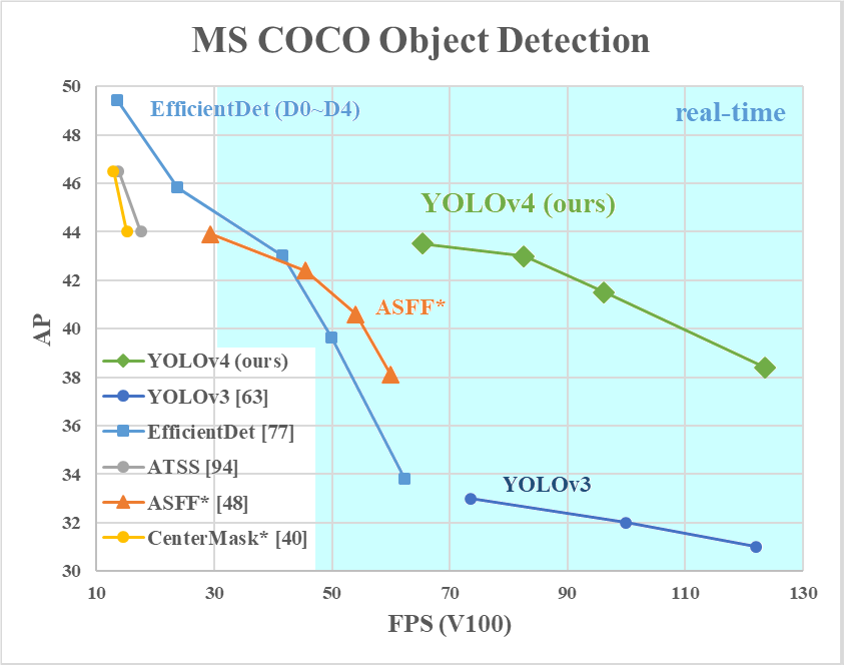

In [4]:
from IPython.display import Image
Image("img/1.png")

2. Заявленные цели и их достижение.  
Главной целью этой работы является проектирование быстро работающего детектора объектов в производственных системах и оптимизация для параллельных вычислений. 
Получено:  
1) Эффективное и быстрое обнаружение объектов. Используя 1080 Ti или 2080 Ti GPU можно построить быстрый и точный детектор.  
2) В ходе обучения детектора проверено влияние современных методов обнаружения объектов  
3) Модифицированы современные методы и сделаны более эффективными и подходящими для обучения на одном GPU  

3. Описание из чего состоит детектор.  
Детектор объектов состоит из несколько частей:   
• Input: Image, Patches, Image Pyramid  
• Backbones: VGG16 [68], ResNet-50 [26], SpineNet[12], EfficientNet-B0/B7 [75], CSPResNeXt50 [81], CSPDarknet53 [81]  
• Neck:  
• Additional blocks: SPP [25], ASPP [5], RFB[47], SAM [85]    
• Path-aggregation blocks: FPN [44], PAN [49], NAS-FPN [17], Fully-connected FPN, BiFPN[77], ASFF [48], SFAM [98]   
• Heads::  
• Dense Prediction (one-stage):  
◦ RPN [64], SSD [50], YOLO [61], RetinaNet[45] (anchor based)  
◦ CornerNet [37], CenterNet [13], MatrixNet[60], FCOS [78] (anchor free)  
• Sparse Prediction (two-stage):  
◦ Faster R-CNN [64], R-FCN [9], Mask RCNN [23] (anchor based)  
◦ RepPoints [87] (anchor free)   


4. Описание и сравнение различных частей алгоритма с другими алгоритмами и описание различных экспериментов на различном оборудовании.  
Сеть YOLOv4 лучше по скорости FPS и точности AP50:95 и AP50 на датасете Microsoft COCO, чем DL-фреймворки и нейронные-сети: Google TensorFlow EfficientDet, FaceBook Detectron RetinaNet/MaskRCNN, PyTorch Yolov3-ASFF, и многие другие… YOLOv4 достигает точности 43.5% AP / 65.7% AP50 на тесте Microsoft COCO при скорости 62 FPS TitanV или 34 FPS RTX 2070. В отличии от других современных детекторов, YOLOv4 может обучить любой, у кого есть видеокарта с 8-16 GB VRAM.   

Сравнение скорости и точности различных детекторов объектов.

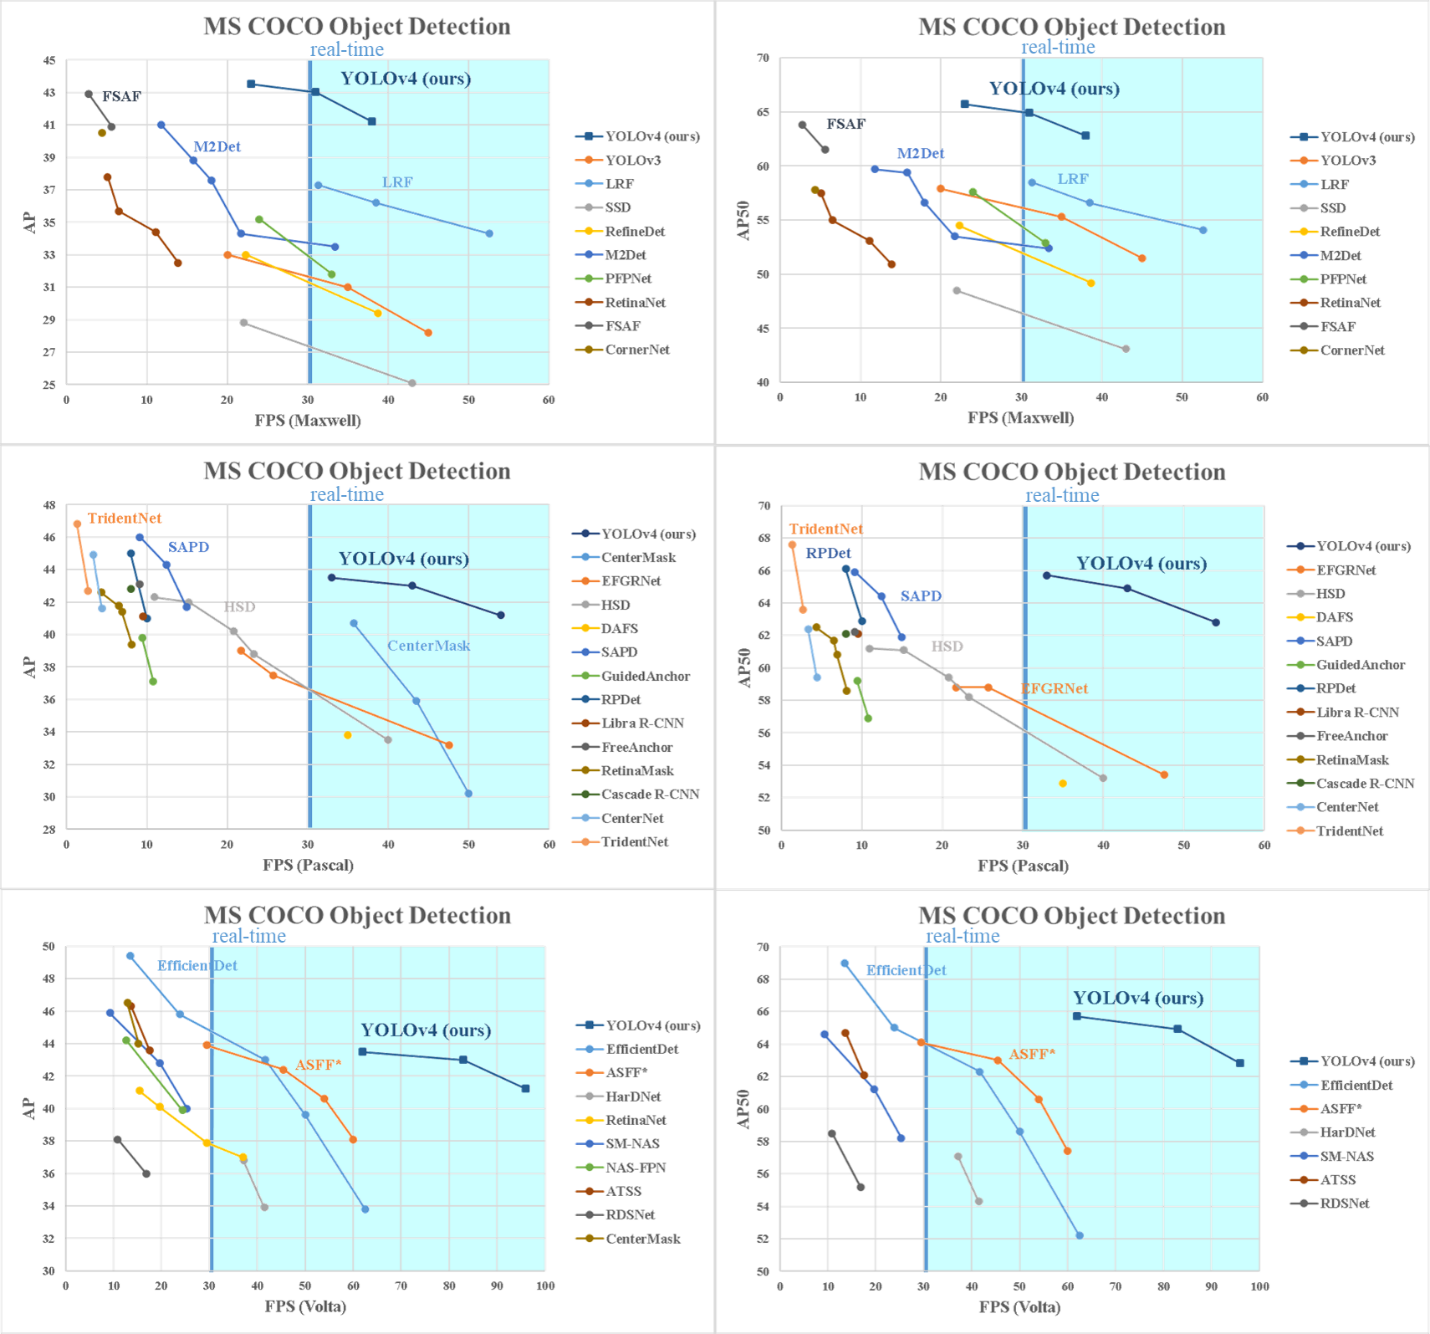

In [5]:
Image("img/2.png")

### 3. Попробуйте улучшить работу нейронной сети рассмотренной в методическом пособии. Приложите анализ. Приложете лучшее сгенерированное изображение к уроку.  

Лучшее что удалось получить после 15 эпох:

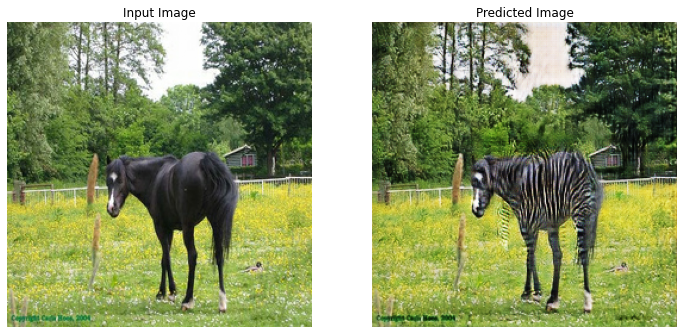

In [6]:
Image("img/3.png")

Данное обучение очень затратно по ресурсам. На 1 эпоху уходило около 40-50 минут при обучении на GPU NVIDIA GeForce GTX 970 4GB VRAM.